## Problem Statement:
#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [210]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [211]:
#import the dataset
df= pd.read_html(r"https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv")
data=df[0]
data

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,NaN,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,NaN,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,NaN,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,NaN,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,NaN,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,NaN,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,NaN,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,NaN,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Dropping Unnamed: 0 and _c39 column which is full of null values.

In [212]:
pd.set_option("display.max_columns", None)

In [213]:
#dropping the column
data.drop(columns=['Unnamed: 0','_c39'],inplace=True)
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [214]:
#shape of the dataset
shape=data.shape
print(shape)

(1000, 39)


In [215]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There are some null values in the dataset. some variables need to be encoded.

In [216]:
#checking if there's any missing values
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are no null values in the dataset. The dataset has lots of features that may or may not related to fraud detection.

N    753
Y    247
Name: fraud_reported, dtype: int64


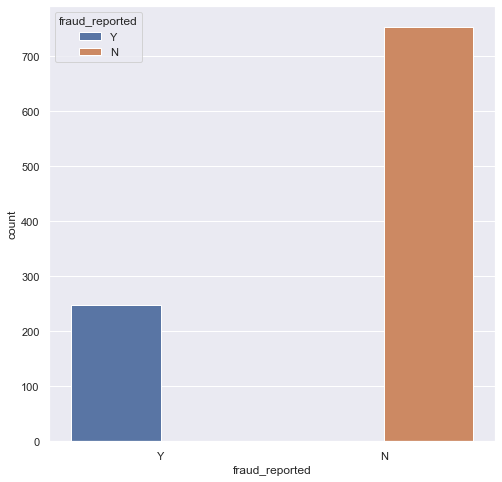

In [217]:
#checking if there's imbalance in the target varibale
print(data.fraud_reported.value_counts())
plt.figure(figsize=(8,8),facecolor='white')
sns.countplot(x='fraud_reported',data=data,hue='fraud_reported')
plt.show()

The target varibalesm "fraud reported" has,

- No 753
- Yes 247

Our dataset is imbalanced.So, if we build the model based on this observatins. our model will be biased. Thus we need to make the dataset balanced.

In [218]:
#descriptive statistics
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


there are '?' in the datset which we have to remove as NaN Values.

In [219]:
#seeing the null values represented as ?
data = data.replace('?',np.NaN)

data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [220]:
#filling the null values in the dataset with mode for categorical and median or mean for numercial
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)
data['property_damage'].fillna(data['property_damage'].mode()[0], inplace = True)
data['police_report_available'].fillna(data['police_report_available'].mode()[0], inplace = True)

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


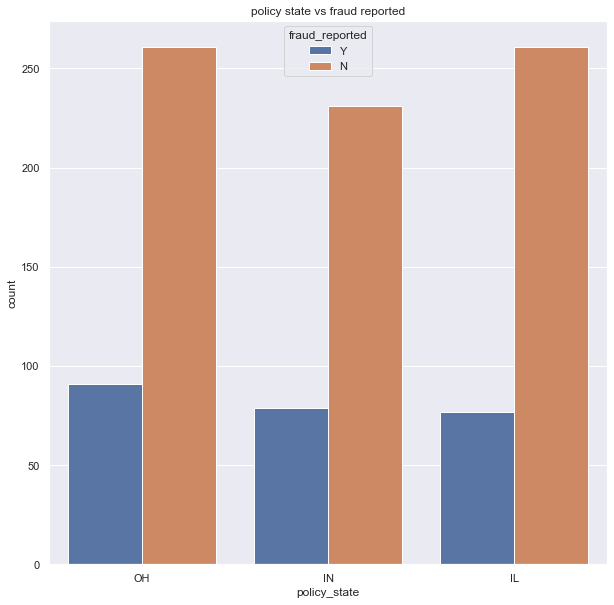

In [221]:
#seeing the number of classes in each categorical variables using countplot
#also the relationship between each variable with Loan status
plt.figure(figsize=(10,10),facecolor='white')
print(data.policy_state.value_counts())
sns.countplot(x='policy_state',hue='fraud_reported',data=data)
plt.title('policy state vs fraud reported')
plt.show()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


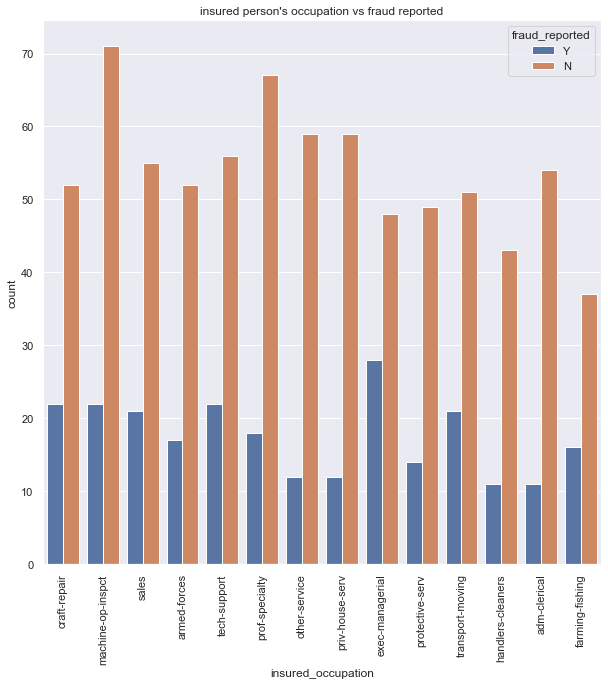

In [222]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.insured_occupation.value_counts())
sns.countplot(x='insured_occupation',hue='fraud_reported',data=data)
plt.title("insured person's occupation vs fraud reported")
plt.xticks(rotation=90)
plt.show()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


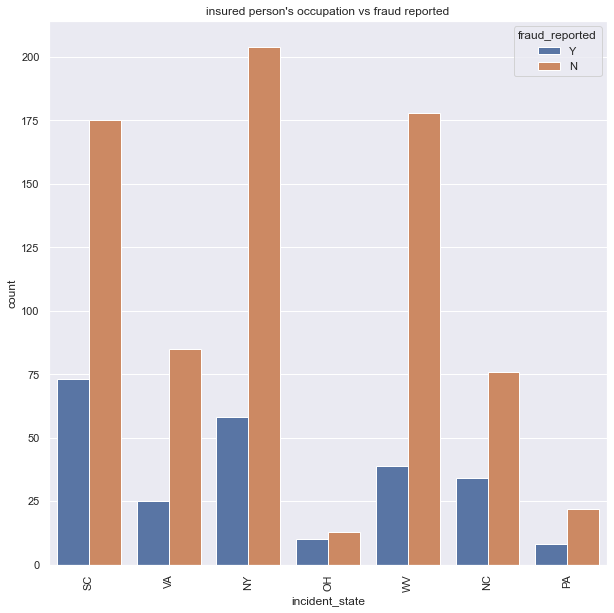

In [223]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.incident_state.value_counts())
sns.countplot(x='incident_state',hue='fraud_reported',data=data)
plt.title("insured person's occupation vs fraud reported")
plt.xticks(rotation=90)
plt.show()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


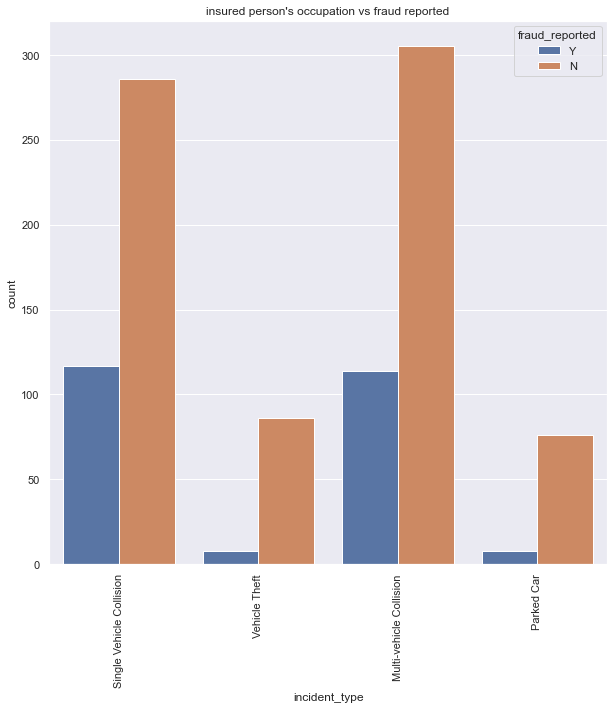

In [224]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.incident_state.value_counts())
sns.countplot(x='incident_type',hue='fraud_reported',data=data)
plt.title("insured person's occupation vs fraud reported")
plt.xticks(rotation=90)
plt.show()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


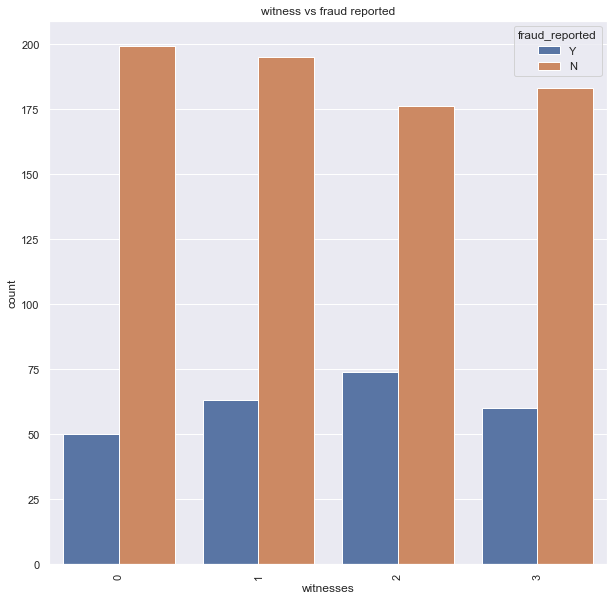

In [225]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.incident_state.value_counts())
sns.countplot(x='witnesses',hue='fraud_reported',data=data)
plt.title("witness vs fraud reported")
plt.xticks(rotation=90)
plt.show()

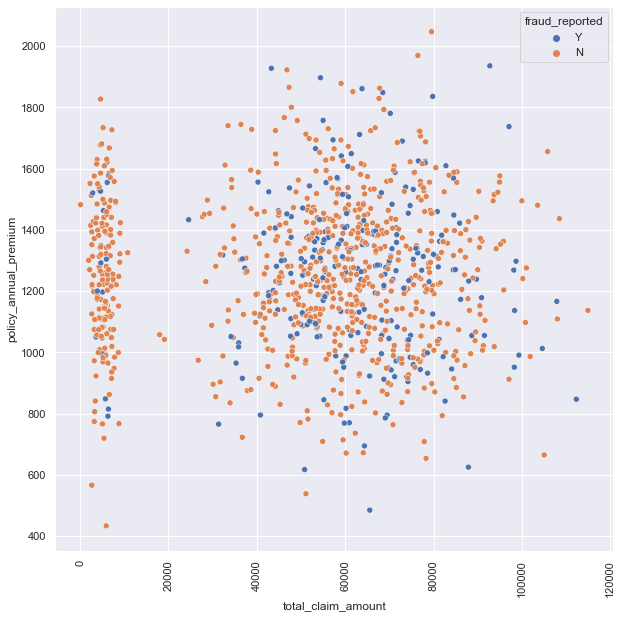

In [226]:
plt.figure(figsize=(10,10),facecolor='white')
sns.scatterplot(x='total_claim_amount',y='policy_annual_premium',hue='fraud_reported',data=data)
plt.xticks(rotation=90)
plt.show()

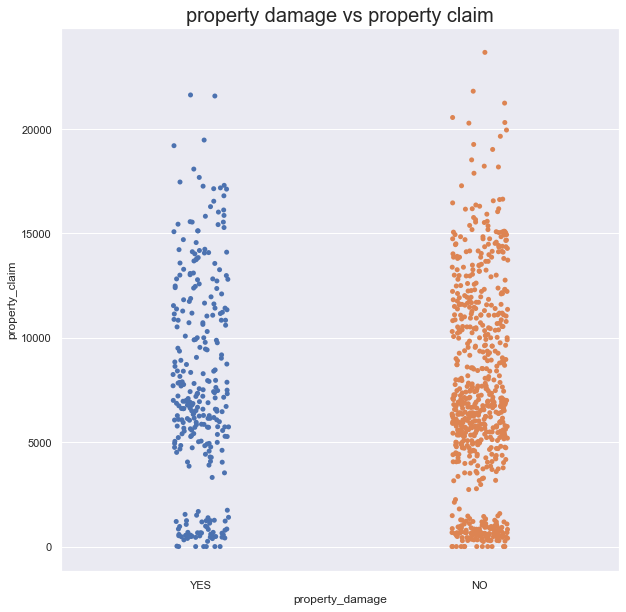

In [227]:
plt.figure(figsize=(10,10),facecolor='white')
sns.stripplot(data['property_damage'], data['property_claim'])
plt.title('property damage vs property claim', fontsize = 20)
plt.show()

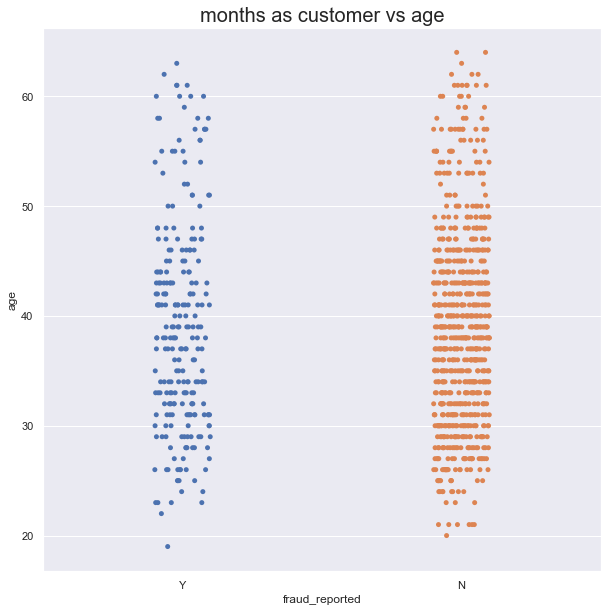

In [228]:
plt.figure(figsize=(10,10),facecolor='white')
sns.stripplot(data['fraud_reported'], data['age'])
plt.title('months as customer vs age', fontsize = 20)
plt.show()

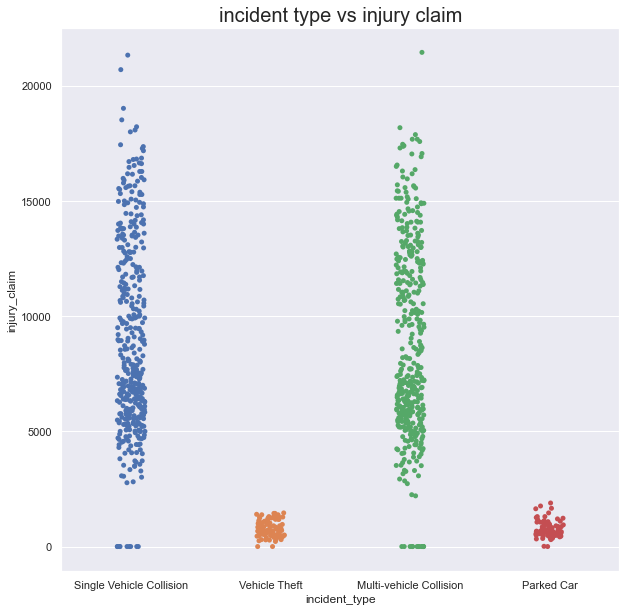

In [229]:
plt.figure(figsize=(10,10),facecolor='white')
sns.stripplot(data['incident_type'], data['injury_claim'])
plt.title('incident type vs injury claim', fontsize = 20)
plt.show()

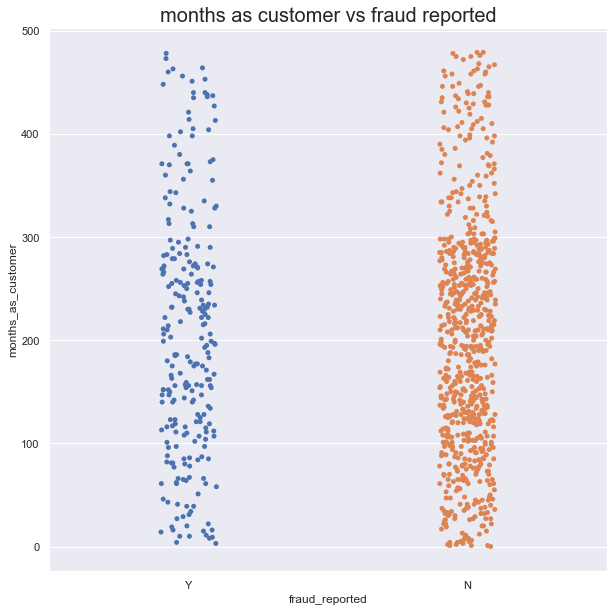

In [230]:
plt.figure(figsize=(10,10),facecolor='white')
sns.stripplot(data['fraud_reported'], data['months_as_customer'])
plt.title('months as customer vs fraud reported', fontsize = 20)
plt.show()

<Figure size 720x720 with 0 Axes>

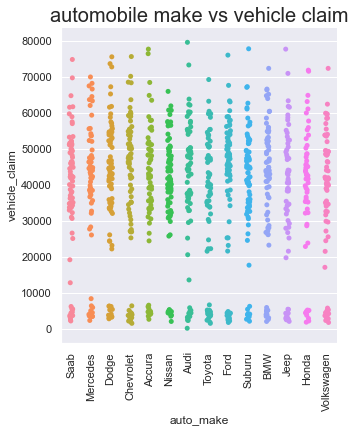

In [231]:
plt.figure(figsize=(10,10),facecolor='white')
sns.set()
sns.catplot(x='auto_make', y='vehicle_claim',data=data)
plt.title('automobile make vs vehicle claim', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

We can see some insights from the graphs above. Now we will start the preprocessing stage.

In [232]:
#encoding the target variable
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

data['fraud_reported']= encoder.fit_transform(data['fraud_reported'])

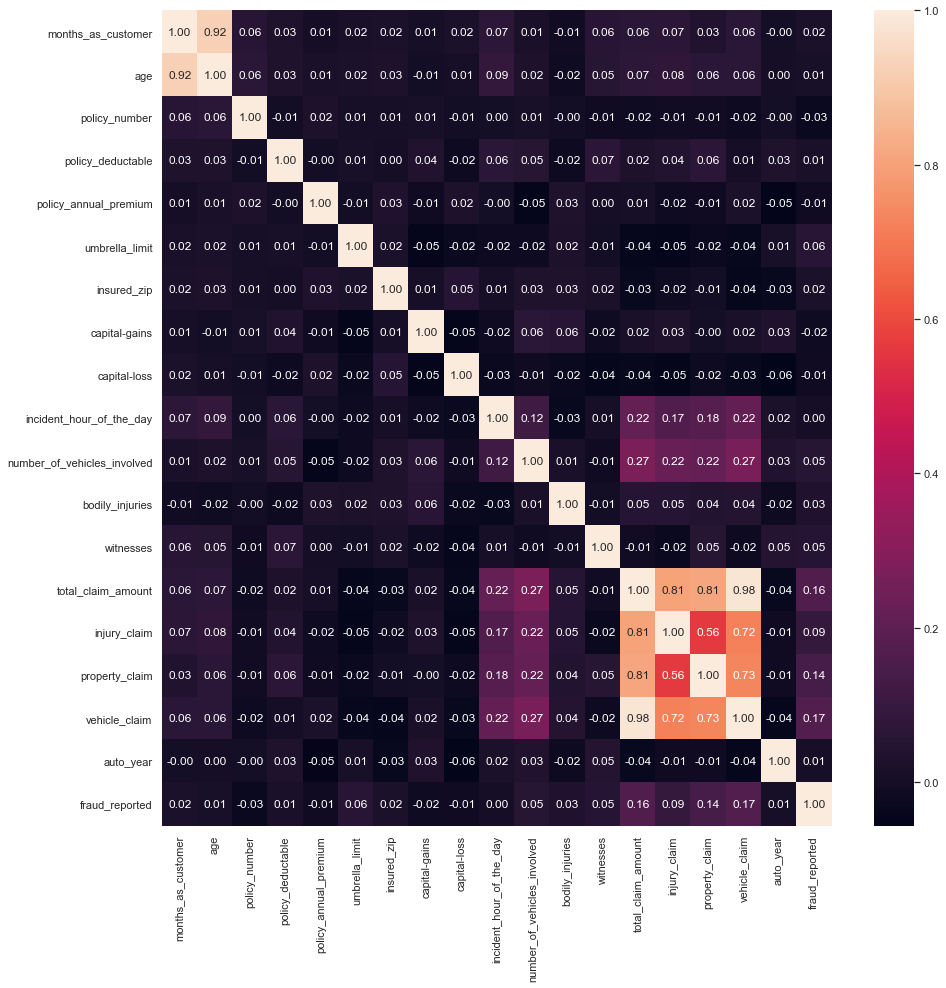

In [233]:
#checking the multicollinearity 
corr_data= data.corr()

plt.figure(figsize=(15,15),facecolor='white')
sns.heatmap(corr_data,annot=True,fmt='.2f')
plt.show()

Most of the features are not multicollinear. Although the claim features are multicollinear.

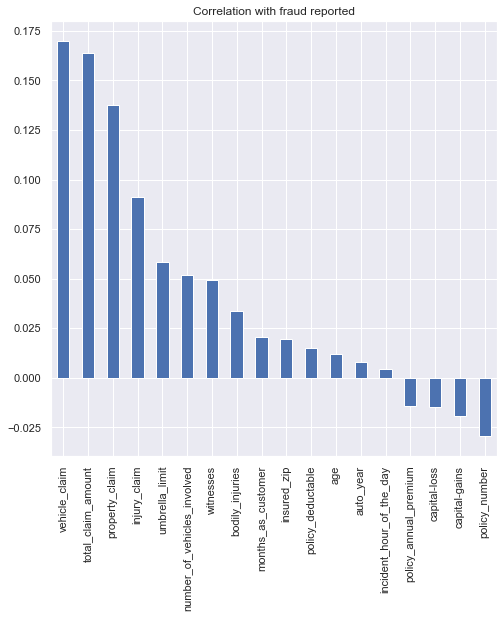

In [234]:
#correlation with the target
plt.figure(figsize=(8,8),facecolor='white')
corr_data.fraud_reported.sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='b',title='Correlation with fraud reported')
plt.show()

- Claim amount, injury claim, property claim etc are the most positively correlated with the target.
- policy number, policy date, incident date, location, auto model, incident hour of the day are not useful for predicting the target variable.

In [235]:
#removing the columns from the dataset
data.drop(columns=['policy_number','policy_bind_date', 'incident_date',
                  'incident_location','incident_hour_of_the_day','auto_model'],inplace=True )

In [236]:
#checking skewness in the dataset
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

The skewness of each features is not a big issue and some features are actually categorical like umbrella limit . Thus leaving them as it is.

In [237]:

#splitting the numercial, categorical features
numerical_data= pd.DataFrame()
categorical_data=pd.DataFrame()
for column in data.columns:
    if data[column].dtypes==object:
        categorical_data[column]= data[column]
    else:
        numerical_data[column]=data[column]
numerical_data.drop(columns='fraud_reported',inplace=True)

In [238]:
#now converting the categorical features into numerical
dummies= pd.get_dummies(categorical_data,drop_first=True)

data= pd.concat([data,dummies],axis=1)
data.drop(columns=list(categorical_data.columns),inplace=True)
data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0,466132,53300,0,1,1,2,71610,6510,13020,52080,2004,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228,42,2000,1197.22,5000000,468176,0,0,1,0,0,5070,780,780,3510,2007,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,134,29,2000,1413.14,5000000,430632,35100,0,3,2,3,34650,7700,3850,23100,2007,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,1,1,2,63400,6340,6340,50720,2014,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,610706,66000,-46000,1,0,1,6500,1300,650,4550,2009,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Building the Model

In [239]:
#splitting the dataset
x= data.drop(columns='fraud_reported')
y=data.fraud_reported

In [240]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [241]:
#splitting the dataset into train and test with the best random state
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=41)

In [242]:
print('training dataset: (checking the categories in the target variable)\n',y_train.value_counts())

training dataset: (checking the categories in the target variable)
 0    584
1    166
Name: fraud_reported, dtype: int64


There is imbalance in the dataset. Weneed to use oversampling since there are more observations.

In [243]:
#Synthetic Minority Oversampling Technique for imbalanced dataset
from imblearn.over_sampling import SMOTE
imb= SMOTE(0.95)
x_train,y_train= imb.fit_resample(x_train,y_train)

In [244]:
print('training dataset: (after oversampling)\n',y_train.value_counts())

training dataset: (after oversampling)
 0    584
1    554
Name: fraud_reported, dtype: int64


In [245]:
#selecting the best k-fold for cross validation score
from sklearn.model_selection import cross_val_score
lr= LogisticRegression()
for j in range(2,10):
    cvs= cross_val_score(lr,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.758
At cross fold 3 cross value score is 0.7409894924864985
At cross fold 4 cross value score is 0.7529999999999999
At cross fold 5 cross value score is 0.748
At cross fold 6 cross value score is 0.7520080321285141
At cross fold 7 cross value score is 0.7530075558244571
At cross fold 8 cross value score is 0.752
At cross fold 9 cross value score is 0.752002002002002


selecting 4 fold for cross validation.

In [269]:
#LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)
y_pred= LR.predict(x_test)

#cross valuation
cvs= cross_val_score(LR,x,y,cv=4)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.52
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.7529999999999999
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[87 82]
 [38 43]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       169
           1       0.34      0.53      0.42        81

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.50       250
weighted avg       0.58      0.52      0.54       250



In [270]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=4)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.7
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.768
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[158  11]
 [ 64  17]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       169
           1       0.61      0.21      0.31        81

    accuracy                           0.70       250
   macro avg       0.66      0.57      0.56       250
weighted avg       0.68      0.70      0.65       250



In [271]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=4)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.744
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.7979999999999999
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[142  27]
 [ 37  44]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       169
           1       0.62      0.54      0.58        81

    accuracy                           0.74       250
   macro avg       0.71      0.69      0.70       250
weighted avg       0.74      0.74      0.74       250



In [272]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)

#cross valuation
cvs= cross_val_score(gb,x,y,cv=4)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.804
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.818
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[147  22]
 [ 27  54]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       169
           1       0.71      0.67      0.69        81

    accuracy                           0.80       250
   macro avg       0.78      0.77      0.77       250
weighted avg       0.80      0.80      0.80       250



In [273]:
#support vector classifier
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

#cross valuation
cvs= cross_val_score(svc,x,y,cv=4)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.628
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.7530000000000001
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[143  26]
 [ 67  14]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.85      0.75       169
           1       0.35      0.17      0.23        81

    accuracy                           0.63       250
   macro avg       0.52      0.51      0.49       250
weighted avg       0.57      0.63      0.59       250



In [274]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
y_pred= xgb.predict(x_test)

#cross valuation
cvs= cross_val_score(xgb,x,y,cv=4)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

[21:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 720x720 with 0 Axes>

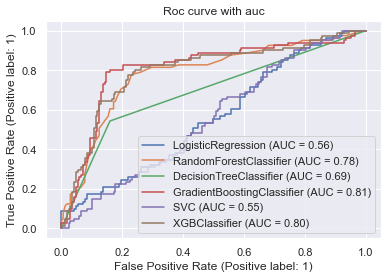

In [275]:
#plotting Roc curve and auc to finding the best model
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(10,10),facecolor='white')
chart= plot_roc_curve(LR,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=chart.ax_)
plot_roc_curve(dt,x_test,y_test,ax=chart.ax_)
plot_roc_curve(gb,x_test,y_test,ax=chart.ax_)
plot_roc_curve(svc,x_test,y_test,ax=chart.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=chart.ax_)
plt.title('Roc curve with auc')
plt.show()

**We will do hyperparameter tuning for the Gradient Boosting Classifier because it has the highest area under the curve of 81% and accuracy of 81% when compared with the other model.**

In [298]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

gb= GradientBoostingClassifier()
param= {"n_estimators":[5,25,50,100],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1],
        "min_samples_leaf":[2,3,4,5],
        "min_samples_split":[2,3,4,5]}

grp= GridSearchCV(gb,param_grid=param)
grp.fit(x_train,y_train)

gb= grp.best_estimator_
gb.fit(x_train,y_train)

#predict
y_pred= gb.predict(x_test)

#accuracy score
print("Accuracy\n", accuracy_score(y_test,y_pred))
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy
 0.816
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[141  28]
 [ 18  63]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       169
           1       0.69      0.78      0.73        81

    accuracy                           0.82       250
   macro avg       0.79      0.81      0.80       250
weighted avg       0.82      0.82      0.82       250



**The Model gives accuracy score of 82%, which is good improvement. Saving the Trained model.**

In [299]:
#saving our trained model
import pickle
pickle.dump(gb,open('Insurance_Claims_Fraud_Detection.pkl','wb'))